### Retail Sales EDA & Insights Report

This project explores a synthetic retail sales dataset to uncover business insights and trends using Python libraries (Pandas, Seaborn, Matplotlib).  
i aim to analyze revenue patterns, product performance, customer types, and payment preferences across various store locations.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import matplotlib.ticker as ticker

In [3]:
df = pd.read_csv ("retail_sales.csv")

In [4]:
df.head(10)

,Transaction ID,Date,Product ID,Product Category,Quantity,Unit Price,Payment Method,Store Location,Customer Type,Total Price
0,TXN100000,2024-09-29,P2824,Groceries,4,39.17,Cash,Port Harcourt,Online,156.68
1,TXN100001,2024-04-18,P1409,Stationery,5,156.07,Debit Card,Abuja,Online,780.35
2,TXN100002,2025-04-25,P5506,Groceries,3,189.62,Mobile Payment,Kano,Online,568.86
3,TXN100003,2024-12-09,P5012,Groceries,5,24.59,Credit Card,Abuja,Walk-in,122.95
4,TXN100004,2023-09-28,P4657,Stationery,5,35.34,Credit Card,Ibadan,Online,176.70
5,TXN100005,2024-10-02,P3286,Books,2,192.20,Cash,Abuja,Walk-in,384.40
6,TXN100006,2024-10-14,P2679,Stationery,3,12.37,Debit Card,Kano,Online,37.11
7,TXN100007,2023-10-18,P9935,Clothing,3,195.64,Debit Card,Port Harcourt,Walk-in,586.92
8,TXN100008,2024-04-26,P2424,Books,3,5.91,Debit Card,Ibadan,Walk-in,17.73
9,TXN100009,2024-09-03,P7912,Stationery,5,175.37,Mobile Payment,Port Harcourt,Walk-in,876.85


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    15000 non-null  object 
 1   Date              15000 non-null  object 
 2   Product ID        15000 non-null  object 
 3   Product Category  15000 non-null  object 
 4   Quantity          15000 non-null  int64  
 5   Unit Price        15000 non-null  float64
 6   Payment Method    15000 non-null  object 
 7   Store Location    15000 non-null  object 
 8   Customer Type     15000 non-null  object 
 9   Total Price       15000 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 1.1+ MB


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.day_name()

## Revenue trend over Time 

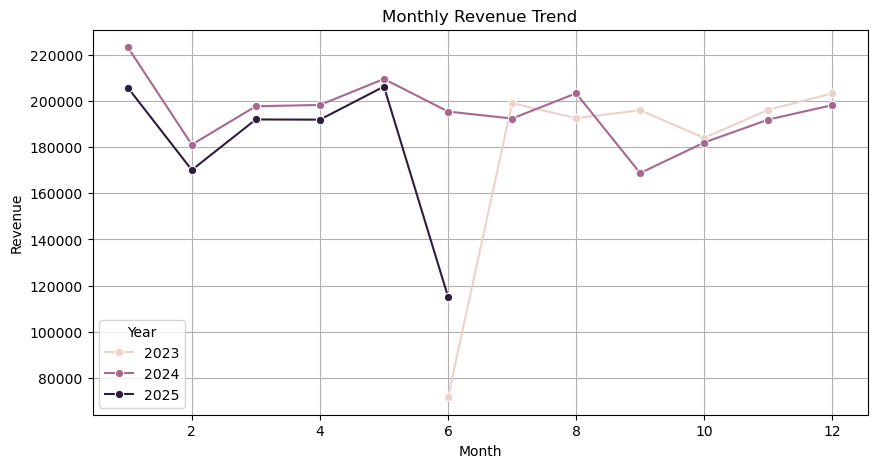

In [8]:
monthly_revenue = df.groupby(['Year', 'Month'])['Total Price'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_revenue, x='Month', y='Total Price', hue='Year', marker='o')
plt.title('Monthly Revenue Trend')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.grid(True)
plt.show()

## Top Product Category 

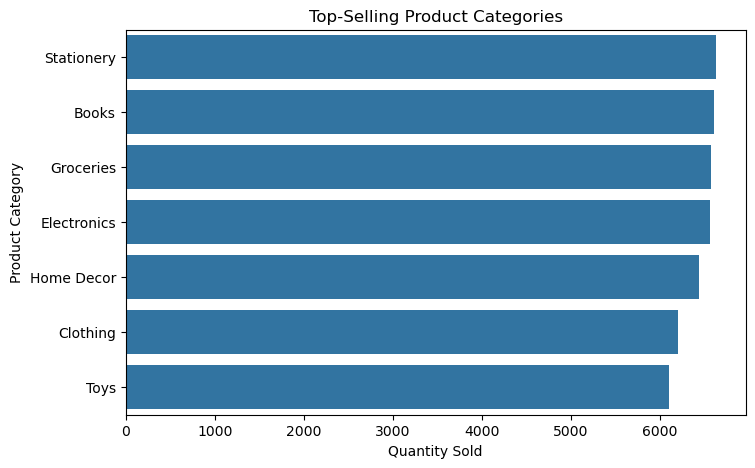

In [10]:
top_products = df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top-Selling Product Categories')
plt.xlabel('Quantity Sold')
plt.show()

## Revenue by Store Location

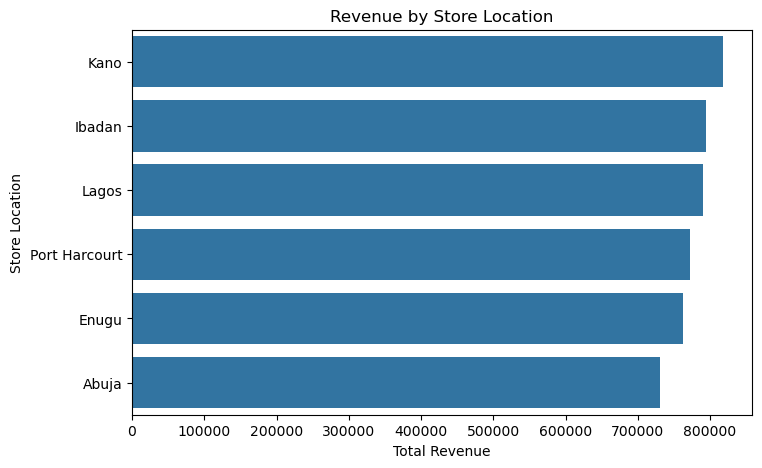

In [30]:
store_revenue = df.groupby('Store Location')['Total Price'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=store_revenue.values, y=store_revenue.index)
plt.title('Revenue by Store Location')
plt.xlabel('Total Revenue')
plt.show()

## Payment Method Distribution 

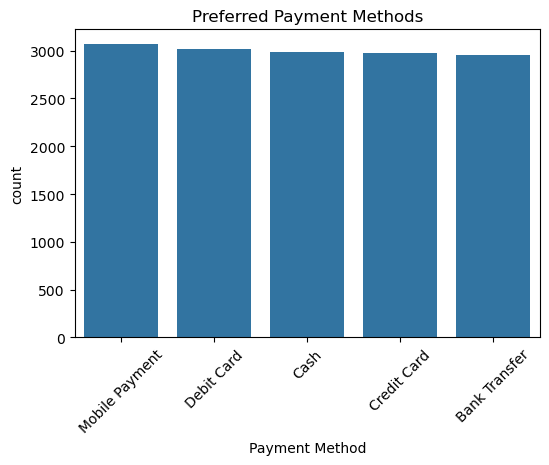

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Payment Method', order=df['Payment Method'].value_counts().index)
plt.title('Preferred Payment Methods')
plt.xticks(rotation=45)
plt.show()

## Customer Spending by Type 

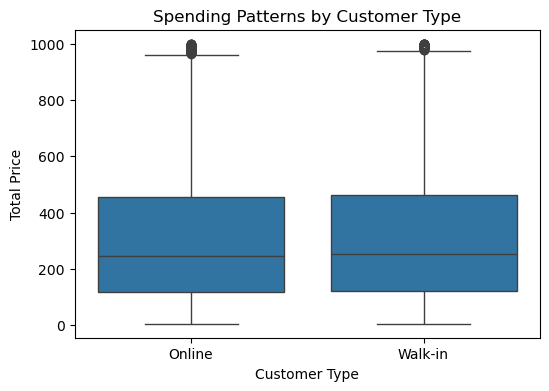

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Customer Type', y='Total Price', data=df)
plt.title('Spending Patterns by Customer Type')
plt.show()

# Key insights 


-  Revenue peaks during [may/2024]
-  Top categories: Stationary,books , Electronics, Groceries
-  Highest sales in: Kano and Ibadan 
-  Preferred payment method: mobile payment 
-  Online customers tend to spend more per transaction

 ## Conclusion

This EDA provided critical business insights from the sales dataset. 
With a deeper understanding of customer behavior, product trends, and revenue patterns, 
stakeholders can make data-driven decisions in inventory, marketing, and operations.
